<a href="https://colab.research.google.com/github/filiperobotic/cursoDL/blob/master/codes/aula3/CNN_Happy_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática Keras - A casa feliz

Nesse exercício você ira trabalhar no problema "Casa Feliz".



In [0]:
!git clone https://github.com/filiperobotic/cursoDL.git
!git clone https://github.com/filiperobotic/datasets.git

In [0]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from datasets.kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

## 1 - A Casa Feliz

Para suas próximas férias, você decidiu passar a semana com 5 amigos. É uma casa muito boa com muitas coisas para fazer por perto. Mas o mais importante benefício é que todo mundo se comprometeu a estar feliz enquanto estiverem na casa. Então, todo mundo que quiser entrar na casa tem que provar o seu estado de alegria.


<img src="https://github.com/filiperobotic/cursoDL/blob/master/imagens/happy-house.jpg?raw=1" style="width:350px;height:270px;">
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **the Happy House**</center></caption>

Como um especialista de deep learning, para assegurar que o estado de "alegria" foi rigorosamente aplicado, você irá desenvolver um algoritmo que usa a foto das pessoas através da câmera da porta de entrada para checar se a pessoa está feliz ou não. A porta deverá abrir apenas se a pessoa estiver feliz!!!
  
Você coletou fotos dos seus amigos e suas, tiradas da câmera da porta de entrara. A base de dados está rotulada.

<img src="https://github.com/filiperobotic/cursoDL/blob/master/imagens/house-members.png?raw=1" style="width:550px;height:250px;">

Execute os seguintes comandos para normalizar a base e observar o formato dela.

In [0]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

**Detalhes da base "Happy" **:
- Imagens são da forma (64,64,3)
- Treinamento: 600 imagens
- Teste: 150 imagens


## 2 - Construindo um modelo no Keras

Keras é muito bom para prototipação rápida. Em apenas poouco tempo é possível construir um modelo que obtém excelentes resultados.

Aqui está um exemplo de modelo no Keras:

```python
def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model
```



**Exercício**: Implemente o modelo 'HappyModel()'. Sugerimos começar a implementação usando o modelo acima com a arquitetura que sugerimos. Posteriormente, volte e tente variar a arquitetura. Você pode testar outras camadas como AveragePooling2D, Dropout, BatchNormalization.


In [0]:
# FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
        # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    

    
    ### END CODE HERE ###
    
    return model

Você contruiu uma função para descrever o modelo. Par atreinar e testar o modelo, são necessários 4 passos no Keras:
1. Criar o modelo chamando a função acima
2. Compilar o modelo chamando  `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`
3. Treinar o modelo no conjunto de treino chamando `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`
4. Testar o modelo no conjunto de teste chamando `model.evaluate(x = ..., y = ...)`



**Exercício**: Implemente o passo 1 (criar o modelo).

In [0]:
### START CODE HERE ### (1 line)
happyModel = 
### END CODE HERE ###

**Exercício**: Implemente o passo2 (compliar o modelo). Escolha os 3 argumentos de `compile()` cuidadosamente. Dica: esse é um problema de classificação binária.

In [0]:
### START CODE HERE ### (1 line)

### END CODE HERE ###

**Exercício**: Implemente o passo 3 (treinar o modelo). Escolha o número de épocas e o batch size.

In [0]:
### START CODE HERE ### (1 line)

### END CODE HERE ###



**Exercício**: Implemente o passo 4. (testar/avaliar o modelo)

In [0]:
### START CODE HERE ### (1 line)
preds = 
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Se seu  `happyModel()` funcionou, você deverá observar uma acurácia muito melhor que o método aleatório (50%) nons conjuntos de treino e teste. É esperado que você consiga uma acurácia de pelo menos 75%. 


**Observação**: Se você realizar ajuste de hiperparâmetro no seu modelo, o conjunto de teste na verdade se torna seu conjunto de validação, e seu modelo pode acabar decorando (overfitting) o conjunto de teste. Mas por enquanto, apenas para fins de exercício, não vamos nos preocupar com isso.


## 3 - Teste com sua própria imagem (Opcional)

Veja se você seria capaz de entrar na casa. Para isso:
    1. Faça o upload da sua imagem
    3. Escreva o caminho dela no código abaixo
    4. Rode o código abaixo e verifique se o algoritmo está certo ( é infeliz, 1 é feliz)!
    


In [0]:
### START CODE HERE ###
img_path = 'imagem.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
fig=plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1, xticks=[], yticks=[])
ax.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))

## 4 - Other useful functions in Keras (Optional)

Two other basic features of Keras that you'll find useful are:
- `model.summary()`: prints the details of your layers in a table with the sizes of its inputs/outputs
- `plot_model()`: plots your graph in a nice layout. You can even save it as ".png" using SVG() if you'd like to share it on social media ;). It is saved in "File" then "Open..." in the upper bar of the notebook.

Run the following code.

In [0]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

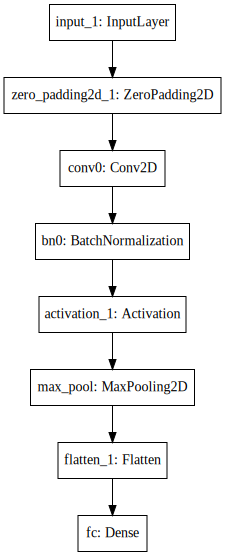

In [0]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))